In [15]:
#Make sure you have the input file in the same folder as the notebook.

In [16]:
!pip install pandas --upgrade

  Using cached pandas-2.0.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl.metadata (1.8 kB)
Using cached pandas-2.0.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.4 MB)
Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)


In [17]:
!pip install scikit-learn --upgrade

  Using cached scikit_learn-1.3.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached scipy-1.10.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.3.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
Using cached scipy-1.10.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [18]:
!pip install matplotlib --upgrade

  Using cached matplotlib-3.7.5-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (5.7 kB)
  Using cached contourpy-1.1.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.9 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl.metadata (6.4 kB)
  Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached packaging-24.1-py3-none-any.whl.metadata (3.2 kB)
  Using cached pillow-10.4.0-cp38-cp38-manylinux_2_28_x86_64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached importlib_resources-6.4.0-py3-none-any.whl.metadata (3.9 kB)
  Using cached zipp-3.19.2-py3-none-an

In [19]:
import pandas as pd

In [20]:
from sklearn.metrics import roc_curve, auc

In [21]:
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('docked_combined_python.csv')

In [23]:
data.head(10)

,ID,S,Rank,real
0,BI-7190,-8.274622,0,active
1,(S)-AU1,-6.818402,173,active
2,TP-238,-6.593113,689,active
3,BZ1,-6.414602,1698,active
4,BZ2,-6.332542,2443,active
5,BI-4827_NC,-6.274476,3080,Inactive
6,DC-BPi-11,-6.263610,3231,active
7,NVS-BPTF-1,-6.239370,3512,active
8,BZ1_NC,-6.017718,6854,active
9,GSK4027,-5.532773,13120,active


In [24]:
# Sorting the DataFrame based on the ranks ('Rank' column) in ascending order
data = data.sort_values(by='Rank', ascending=True)

In [25]:
# Choose the positive class (e.g., 'active')
positive_class = 'active'

In [26]:
# Convert 'real' column to binary labels
data['binary_real'] = (data['real'] == positive_class).astype(int)

In [27]:
# Sorting the DataFrame based on the ranks ('Rank' column) in ascending order
data = data.sort_values(by='Rank', ascending=True)

In [28]:
fpr, tpr, thresholds = roc_curve(data['binary_real'], -data['Rank'])  # Negate 'Rank' to treat lower ranks as better
roc_auc = auc(fpr, tpr)

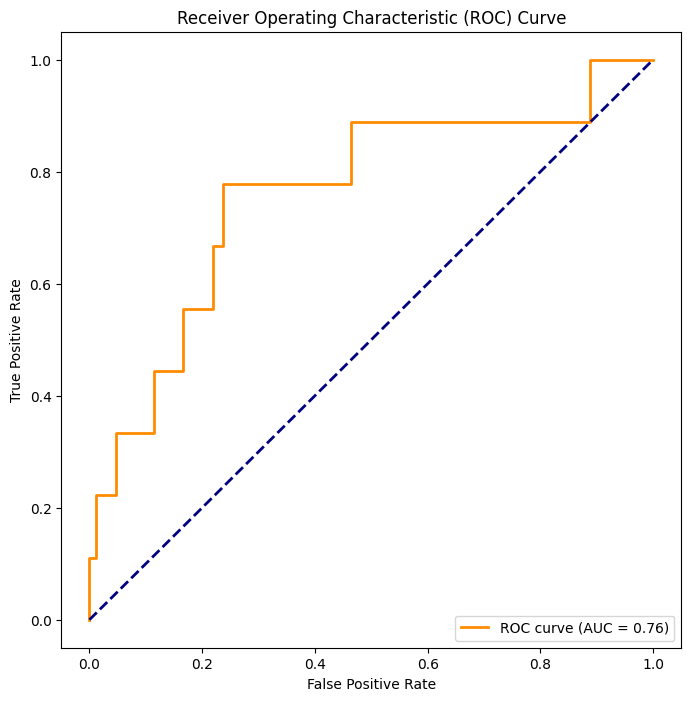

In [29]:
#plot the Results
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()